# The purpose of this notebook is to get more knowledge about these datasets

In [1]:
##TODO - EDA -> try to build features by heuristics and then build model ?? -> super easy and cool
##TODO -> Get to know data better. Actually data analysis is where we should start

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
import re

## Most occuring words in clickbaits and no-clikbaits

In [6]:
df_merged = pd.read_csv("data/merged_datasetes_balanced.csv")

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

In [8]:
x_train_clickbait = x_train[y_train==1]
x_train_no_clickbait = x_train[y_train==0]

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [58]:
def get_most_common_words(x_train):
    # Docstring ...
    words = x_train.str.split().explode().tolist()
    words_no_stop_words = [word.lower() for word in words if word.lower() not in stop_words]
    counter = Counter(words_no_stop_words)
    most_common_words = counter.most_common(15)
    return most_common_words
    

In [59]:
df_clibkaits = pd.DataFrame(get_most_common_words(x_train_clickbait), columns=['Word', 'Frequency'])
df_NO_clibkaits = pd.DataFrame(get_most_common_words(x_train_no_clickbait), columns=['Word', 'Frequency'])

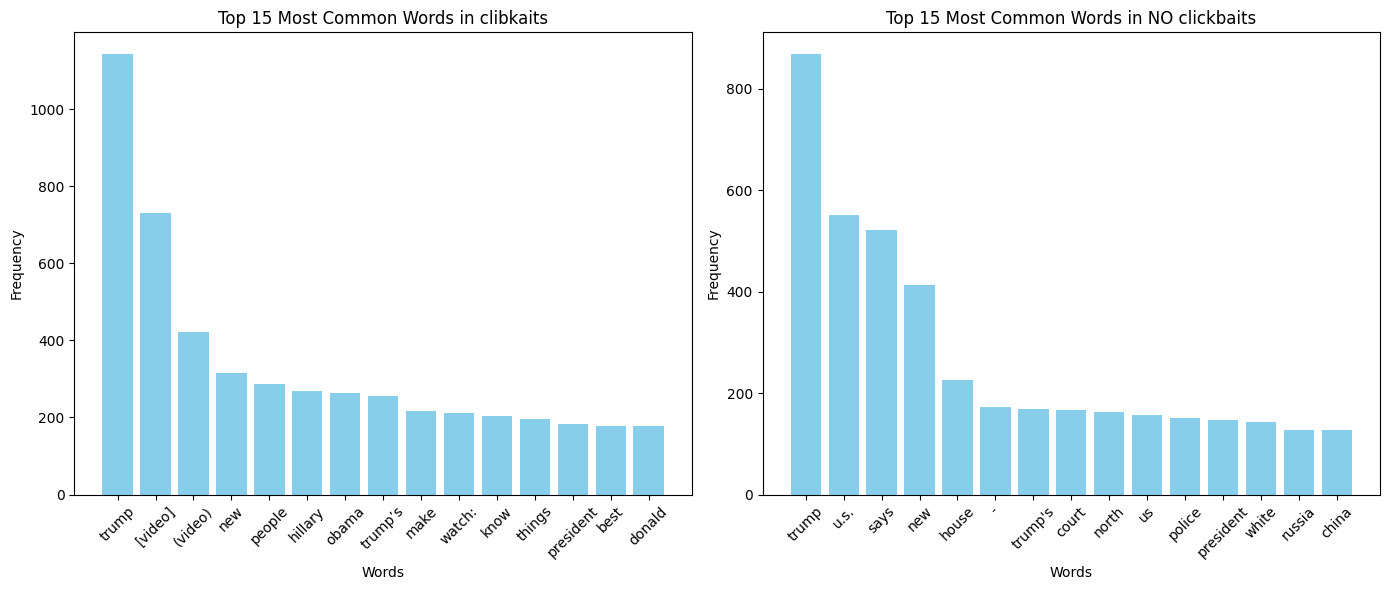

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].bar(df_clibkaits['Word'], df_clibkaits['Frequency'], color='skyblue')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 15 Most Common Words in clibkaits')
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(df_NO_clibkaits['Word'], df_NO_clibkaits['Frequency'], color='skyblue')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 15 Most Common Words in NO clickbaits')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()